# Airport Delay Project

## 1. Read the Data 
 OAG Data + WU Weather Data

In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import statsmodels.formula.api as sm
from IPython.core.interactiveshell import InteractiveShell # show all results of commands
InteractiveShell.ast_node_interactivity = "all"

In [2]:
pwd #current working folder location

'F:\\Dropbox\\Flight\\Code'

In [6]:
path= 'F:\\Dropbox\\Flight\\DATA\\cleaned_data' #for load the data
path2= 'F:\\Dropbox\\Flight\\Code\\results' #for results saving
path

'F:\\Dropbox\\Flight\\DATA\\cleaned_data'

In [7]:
os.chdir(path) # set the path as working directory.

In [12]:
df= pd.read_csv(path+'\\prepare_data.csv', parse_dates=['time','S_Dep_time','S_Arr_time'])
#parse data help the conversion string to datetime dtype.

C:\Users\Jukwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (82,86,88,90,92,94,96,98,100,106,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# pd.set_option('display.max_rows', 8) # change presets for date preview
# pd.reset_option('display.max_rows')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,...,RecordTypeFlag,HourlyPrecip,HourlyPrecipFlag,Altimeter,AltimeterFlag,time,next_obs,mid,id,_merge
0,0,0,2014,4,10,21,2,2014-10-21,DL,19790,...,,,,29.93,,2014-10-21 11:54:00,2014-10-21 12:54:00,2014-10-21 12:24:00,627.0,both
1,1,1,2014,4,10,21,2,2014-10-21,DL,19790,...,,,,29.93,,2014-10-21 11:54:00,2014-10-21 12:54:00,2014-10-21 12:24:00,627.0,both
2,2,2,2014,4,10,21,2,2014-10-21,FL,20437,...,,,,29.93,,2014-10-21 11:54:00,2014-10-21 12:54:00,2014-10-21 12:24:00,627.0,both
3,3,3,2014,4,10,21,2,2014-10-21,AA,19805,...,,,,29.93,,2014-10-21 11:54:00,2014-10-21 12:54:00,2014-10-21 12:24:00,627.0,both
4,4,4,2014,4,10,21,2,2014-10-21,AA,19805,...,,,,29.93,,2014-10-21 11:54:00,2014-10-21 12:54:00,2014-10-21 12:24:00,627.0,both


In [8]:
os.chdir(path2) # change directory.

In [18]:
a=df.dtypes
print(a.tail(70))

LongestAddGTime                     float64
DivAirportLandings                    int64
DivReachedDest                      float64
DivActualElapsedTime                float64
DivArrDelay                         float64
DivDistance                         float64
Div1Airport                          object
Div1AirportID                       float64
Div1AirportSeqID                    float64
Div1WheelsOn                        float64
key                                   int64
sd_time                               int64
sa_time                               int64
S_Dep_time                   datetime64[ns]
S_Arr_time                   datetime64[ns]
Dep_wban                            float64
Arr_wban                            float64
con                                  object
time_x                               object
time_y                               object
new_id                              float64
WBAN                                  int64
Date                            

In [10]:
# del df["Unnamed: 0"]
# del df["Unnamed: 0.1"]

# 2. Data Cleaning

In [11]:
## overall there is 2 flight which has string flight no.
df['flt_no'].replace(['620A','052A'],[620,52], inplace= True)
df[['flt_no']] = df[['flt_no']].apply(pd.to_numeric)

In [12]:
## drop if flight is not actually operate. 
## df[] = df[df.actual_departure_time.notnull()]

In [13]:
# ## change the d type from string to datetime.
# # this part replaced by read_csv(, parse_dates= ['','']) option.
# df['scheduled_arrival_time']=pd.to_datetime(df['scheduled_arrival_time'])
# df['actual_arrival_time']=pd.to_datetime(df['actual_arrival_time'])
# df['scheduled_departure_time']=pd.to_datetime(df['scheduled_departure_time'])
# df['actual_departure_time']=pd.to_datetime(df['actual_departure_time'])

In [14]:
##  adding date and time and put it in to a column
coln= ['scheduled_departure','scheduled_arrival','actual_departure','actual_arrival']

for hey in coln:
    new_hey= hey+"_n"
    hey_date=hey+"_date"
    hey_time= hey+"_time"
    print(new_hey)
    hour=df[hey_time].dt.hour
    min=df[hey_time].dt.minute
    sec=df[hey_time].dt.second
    new_time = pd.DataFrame({'time': pd.to_datetime(df[hey_date])+pd.to_timedelta(hour,unit='h')+pd.to_timedelta(min,unit='m')+pd.to_timedelta(sec,unit='s')})
    df[new_hey]=new_time
#new variables

scheduled_departure_n
scheduled_arrival_n
actual_departure_n
actual_arrival_n


In [15]:
### this part replaced by for_loop code above
df['sd_hour']=df['scheduled_departure_n'].dt.hour
# sd_min=df['scheduled_departure_time'].dt.minute
# sd_sec=df['scheduled_departure_time'].dt.second
# sd_time = pd.DataFrame({'time': pd.to_datetime(df["scheduled_departure_date"])+pd.to_timedelta(sd_hour,unit='h')+pd.to_timedelta(sd_min,unit='m')+pd.to_timedelta(sd_sec,unit='s')})


# sa_hour=df['scheduled_arrival_time'].dt.hour
# sa_min= df['scheduled_arrival_time'].dt.minute
# sa_sec= df['scheduled_arrival_time'].dt.second
# sa_time = pd.DataFrame({'time': pd.to_datetime(df["scheduled_arrival_date"])+pd.to_timedelta(sa_hour,unit='h')+pd.to_timedelta(sa_min,unit='m')+pd.to_timedelta(sa_sec,unit='s')})
# df['sa_time']=sa_time

# aa_hour=df['actual_arrival_time'].dt.hour
# aa_min= df['actual_arrival_time'].dt.minute
# aa_sec= df['actual_arrival_time'].dt.second
# aa_time = pd.DataFrame({'time': pd.to_datetime(df["actual_arrival_date"])+pd.to_timedelta(aa_hour,unit='h')+pd.to_timedelta(aa_min,unit='m')+pd.to_timedelta(aa_sec,unit='s')})
# df['aa_time']=aa_time

# ad_hour=df['actual_departure_time'].dt.hour
# ad_min= df['actual_departure_time'].dt.minute
# ad_sec= df['actual_departure_time'].dt.second
# ad_time = pd.DataFrame({'time': pd.to_datetime(df["actual_departure_date"])+pd.to_timedelta(ad_hour,unit='h')+pd.to_timedelta(ad_min,unit='m')+pd.to_timedelta(ad_sec,unit='s')})
# df['ad_time']=ad_time
df['sd_hour'].head(10)

0     9
1    11
2    10
3    10
4    12
5    11
6    12
7     8
8    10
9    12
Name: sd_hour, dtype: int64

In [16]:
# ## unique values
# for col_name in df.columns:
#     if df[col_name].dtypes == 'object':
#         unique_cat = len(df[col_name].unique())
#         print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

In [17]:
### delay in departure.

# scheduled_departure_n
# scheduled_arrival_n
# actual_departure_n
# actual_arrival_n
df['delay_dep'] = df['actual_departure_n']-df['scheduled_departure_n']
df['delay_dep'].describe()

count                    469601
mean     0 days 00:09:31.939327
std      0 days 00:44:54.098404
min           -1 days +00:00:00
25%           -1 days +23:55:00
50%           -1 days +23:59:00
75%             0 days 00:10:00
max             2 days 13:33:00
Name: delay_dep, dtype: object

In [18]:
## delay time in arrival

df['delay_arr'] = df['actual_arrival_n']-df['scheduled_arrival_n']
df['delay_arr'].describe()

count                    466948
mean     0 days 00:05:44.526242
std      0 days 00:50:03.740840
min           -3 days +20:34:00
25%           -1 days +23:48:00
50%           -1 days +23:57:00
75%             0 days 00:12:00
max             2 days 01:08:00
Name: delay_arr, dtype: object

In [20]:
##deling with the time convert time which can be shown as distribution 
df['diff_arr']=df['delay_arr'].dt.total_seconds()
df['diff_dep']=df['delay_dep'].dt.total_seconds()
print(df['diff_arr'].head())##dealing with the time : convert time which can be shown as distribution 
df['diff_arr'].describe()

0    2400.0
1       NaN
2    -660.0
3   -1080.0
4    -720.0
Name: diff_arr, dtype: float64


count    466948.000000
mean        344.526243
std        3003.740840
min     -185160.000000
25%        -720.000000
50%        -180.000000
75%         720.000000
max      176880.000000
Name: diff_arr, dtype: float64

In [21]:
##delay indicator_arrival(0,1)

mask = df['delay_arr'] > datetime.timedelta(minutes=15)
df['late_arr'] = mask.astype(int)

df['late_arr'].value_counts()

0    440751
1    100275
Name: late_arr, dtype: int64

In [22]:
##delay indicator_depature(0,1:if delay time is larger than 15 min)

mask = df['delay_dep'] > datetime.timedelta(minutes=15)
df['late_dep'] = mask.astype(int)

df['late_dep'].value_counts()

0    448686
1     92340
Name: late_dep, dtype: int64

In [23]:
## indcate early departure = 1 if delay < -15 min,
##delay indicator
mask = (df['delay_dep']< datetime.timedelta(minutes=-15))
df['early_dep'] = mask.astype(int)

df['early_dep'].value_counts()



0    538800
1      2226
Name: early_dep, dtype: int64

In [24]:
mask = (df['delay_arr']< datetime.timedelta(minutes=-15))

df['early_arr'] = mask.astype(int)

df['early_arr'].value_counts()

0    458793
1     82233
Name: early_arr, dtype: int64

In [10]:
## need to double check the rawdata....
# list(df)
# ## df[] = df[df.actual_departure_time.notnull()]
mask =df.actual_departure_n.isnull()
mask.sample(5)
df['cancelled'] = mask.astype(int)
df['cancelled'].value_counts()

# df.sort_values(by='cancelled')

AttributeError: 'DataFrame' object has no attribute 'actual_departure_n'

In [26]:
# indicate the data: north and south arrival date | departuredata

# North departure
mask=(df['dep_airport_code']== 'BOS') |(df['dep_airport_code']== 'PVD')|(df['dep_airport_code']== 'MHT') |(df['dep_airport_code']== 'ORH') ;mask
df['north_dep']=mask.astype(int)
print(df['north_dep'].value_counts())
# North arrival
mask=(df['arr_airport_code']== 'BOS') |(df['arr_airport_code']== 'PVD')|(df['arr_airport_code']== 'MHT') |(df['arr_airport_code']== 'ORH') ;mask
df['north_arr']=mask.astype(int)
print(df['north_arr'].value_counts())

# indicate dep south
mask=(df['dep_airport_code']== 'LAX') |(df['dep_airport_code']== 'SNA')|(df['dep_airport_code']== 'BUR') |(df['dep_airport_code']== 'LGB') ;mask
df['south_dep']=mask.astype(int)
print(df['south_dep'].value_counts())

# south arrival
mask=(df['arr_airport_code']== 'LAX') |(df['arr_airport_code']== 'SNA')|(df['arr_airport_code']== 'BUR') |(df['arr_airport_code']== 'LGB') ;mask
df['south_arr']=mask.astype(int)
print(df['south_arr'].value_counts())


0    448169
1     92857
Name: north_dep, dtype: int64
0    449600
1     91426
Name: north_arr, dtype: int64
0    358532
1    182494
Name: south_dep, dtype: int64
0    358688
1    182338
Name: south_arr, dtype: int64


In [27]:
## or can use mapping 1. make dictionary 
city_to_dic={ 'BOS': 'North', 'PVD' :'North', 'MHT':'North', 'ORH': 'North', \
             'LAX' : 'South', 'LGB':'South', 'BUR':'South','SNA':'South' }
## 1. maping the function
df['loca_dep']= df['dep_airport_code'].map(city_to_dic)
df['loca_arr']= df['arr_airport_code'].map(city_to_dic)
df['loca_dep'].value_counts()


South    182494
North     92857
Name: loca_dep, dtype: int64

In [28]:
# location north = 1 or south =0
mask = (df['north_dep']==1)|(df['north_arr']==1)
df['north'] =mask.astype(int)
df['north'].value_counts()


0    356744
1    184282
Name: north, dtype: int64

In [29]:
# dep:  departure = 1 arrrival = 0
mask = (df['south_dep']==1)|(df['north_dep']==1)
df['dep']=mask.astype(int)
df['dep'].value_counts()

1    275351
0    265675
Name: dep, dtype: int64

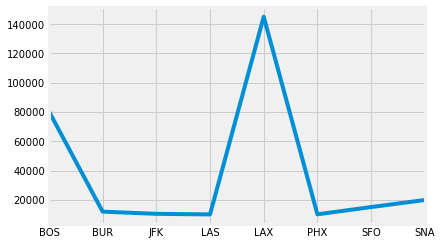

In [30]:
#  # of depature flights by airport

df['dep_airport_code'].value_counts().head(8).sort_index().plot()

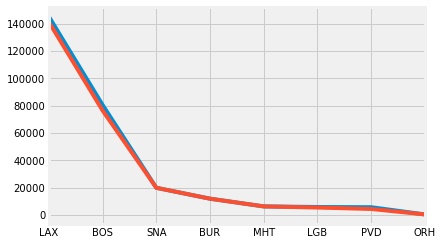

In [31]:
 # of flights by airport
df['dep_airport_code'].where(df['dep']==1).value_counts().head(8).plot()
df['arr_airport_code'].where(df['dep']==0).value_counts().head(8).plot()

In [32]:
# #data slice
df_dep = df[df['dep']==1] # departure data
df_arr = df[df['dep']==0]


In [33]:
# % gen delay = 'delay_arr' if [dep] ==1
# % replace delay = delay_dep if df['dep'] ==0
#df[:,'delay']= df.loc[:,'delay_dep]
# delay.head(10)
# delay.describe()
# pd.merge(df,delay)

df['delay']=np.where(df['dep']==1, df['diff_dep'],df['diff_arr'])

In [34]:
df['delay'].head(4)

0    2400.0
1       NaN
2    -660.0
3   -1080.0
Name: delay, dtype: float64

In [35]:
df['airport']= np.where(df['dep']==1, df['dep_airport_code'],df['arr_airport_code'])

In [36]:
df['airport'].head(3)

0    BOS
1    BOS
2    BOS
Name: airport, dtype: object

In [37]:
df['scheduled_departure_month'].value_counts()

10    95779
3     94521
12    91395
1     89246
11    88390
2     81695
Name: scheduled_departure_month, dtype: int64

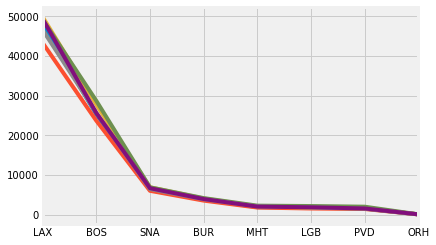

In [38]:
df['airport'].where(df['scheduled_departure_month']==1).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==2).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==3).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==10).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==11).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==12).value_counts().plot()

In [39]:
#dep = 1 means departure data.
#scheduled time = depature time if departure if not (arrival data) then schedueld arrival time
df['s_operation_time'] = np.where(df['dep']==1, df['scheduled_departure_n'], df['scheduled_arrival_n'])
df['s_operation_time'].head(3)

0   2014-11-15 12:43:00
1   2014-11-15 13:01:00
2   2014-11-15 12:54:00
Name: s_operation_time, dtype: datetime64[ns]

In [40]:
df['a_operation_time'] = np.where(df['dep']==1, df['actual_departure_n'], df['actual_arrival_n'])
df['a_operation_time'].head(3)

0   2014-11-15 13:23:00
1                   NaT
2   2014-11-15 12:43:00
Name: a_operation_time, dtype: datetime64[ns]

In [41]:
df['delay_at_airport']= df['a_operation_time']-df['s_operation_time']
df['delay_at_airport'].head()

0            00:40:00
1                 NaT
2   -1 days +23:49:00
3   -1 days +23:42:00
4   -1 days +23:48:00
Name: delay_at_airport, dtype: timedelta64[ns]

In [42]:
df['delay'].head(5)

0    2400.0
1       NaN
2    -660.0
3   -1080.0
4    -720.0
Name: delay, dtype: float64

In [43]:
df.sort_values(by="delay", ascending =False)[:5]

,Unnamed: 0,flt_no,airline_code,airline_name,dep_airport_code,dep_airport_name,scheduled_departure_date,scheduled_departure_month,scheduled_departure_time,actual_departure_date,...,south_dep,south_arr,loca_dep,loca_arr,north,dep,delay,s_operation_time,a_operation_time,delay_at_airport
319787,139146,1212,DL,Delta Air Lines,HNL,Honolulu,2015-02-13,2,2017-10-19 22:07:00,2015-02-16,...,0,1,NaN,South,0,0,176880.0,2015-02-14 05:39:00,2015-02-16 06:47:00,2 days 01:08:00
142803,64364,238,EK,Emirates,BOS,Boston Logan International Apt,2014-11-01,11,2017-10-19 23:15:00,2014-11-03,...,0,0,North,NaN,1,1,95640.0,2014-11-01 23:15:00,2014-11-03 01:49:00,1 days 02:34:00
236467,55826,224,AA,American Airlines,LAS,Las Vegas McCarran International Apt,2015-01-18,1,2017-10-19 11:30:00,2015-01-19,...,0,1,NaN,South,0,0,95580.0,2015-01-18 12:46:00,2015-01-19 15:19:00,1 days 02:33:00
187455,6814,270,AA,American Airlines,HNL,Honolulu,2015-03-04,3,2017-10-19 08:28:00,2015-03-05,...,0,1,NaN,South,0,0,94560.0,2015-03-04 15:55:00,2015-03-05 18:11:00,1 days 02:16:00
516732,15408,660,US,US Airways,PHX,Phoenix Sky Harbor Intl Apt,2015-03-07,3,2017-10-19 18:00:00,2015-03-07,...,0,1,NaN,South,0,0,88860.0,2015-03-07 18:16:00,2015-03-08 18:57:00,1 days 00:41:00


In [44]:
results=[]

In [45]:
## save this and expor to excel.

desc_d =df_dep.groupby('dep_airport_code').describe()     
desc_a= df_arr.groupby('arr_airport_code').describe()  

results.append(desc_d)
results.append(desc_a)
append_results= pd.concat(results, axis= 0)
append_results.to_excel('description.xlsx')

In [46]:
delay_arr= df.groupby(['airport','late_arr'])

delay_arr=delay_arr.size().unstack()
delay_arr
#late_arr is arrival >15

late_arr,0,1
airport,,
BOS,126832,30050
BUR,20736,3022
LAX,230193,56094
LGB,9432,1609
MHT,10188,2278
ORH,612,118
PVD,8443,1717
SNA,34315,5387


In [47]:
dep_lateby = df.groupby(['scheduled_departure_month','late_dep','airport'])
delay_dep= dep_lateby.size().unstack()

In [48]:
delay_dep

airport                               BOS   BUR    LAX   LGB   MHT  ORH   PVD  \
scheduled_departure_month late_dep                                              
1                         0         21058  3356  39652  1571  1539  105  1290   
                          1          4266   558   8366   233   395   19   284   
2                         0         17940  3013  35206  1337  1431   88  1167   
                          1          5775   575   8106   263   408   24   307   
3                         0         22856  3593  38816  1554  1729  112  1409   
                          1          4900   533  11053   260   428   12   323   
10                        0         25043  4092  43391  1889  2077  109  1992   
                          1          3685   130   5781   167   241   16   228   
11                        0         22372  3678  40010  1583  1906  113  1383   
                          1          3333   244   6580   282   231    8   166   
12                        0         21569  3001  36873  1575  1671  110  1342   
                          1          4085   985  12453   327   410   14   269   

airport                              SNA  
scheduled_departure_month late_dep        
1                         0         5576  
                          1          978  
2                         0         5129  
                          1          926  
3                         0         5979  
                          1          964  
10                        0         6411  
                          1          527  
11                        0         5911  
                          1          590  
12                        0         5079  
                          1         1632

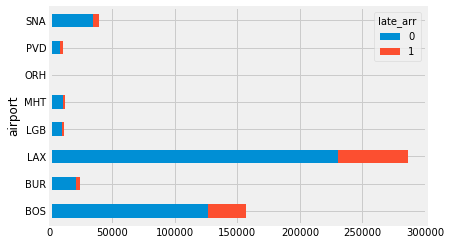

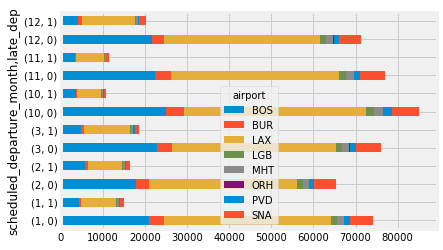

In [49]:

delay_arr.plot(kind='barh',stacked=True)
delay_dep.plot(kind='barh',stacked=True)

In [50]:
flights_by_airport = df.pivot_table(index='scheduled_departure_date', columns='airport', values='flt_no', aggfunc='count')
flights_by_airport.head(10)


airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
scheduled_departure_date,,,,,,,,
2014-10-01,964,146,1583,64,80,4,108,236
2014-10-02,999,146,1663,67,80,4,112,238
2014-10-03,1016,146,1665,66,80,4,114,238
2014-10-04,693,94,1341,63,57,4,90,168
2014-10-05,908,134,1628,67,73,4,105,218
2014-10-06,1003,144,1655,68,80,4,113,238
2014-10-07,956,142,1578,67,80,4,108,230
2014-10-08,971,146,1600,66,80,4,108,236
2014-10-09,1012,146,1662,69,80,4,107,238


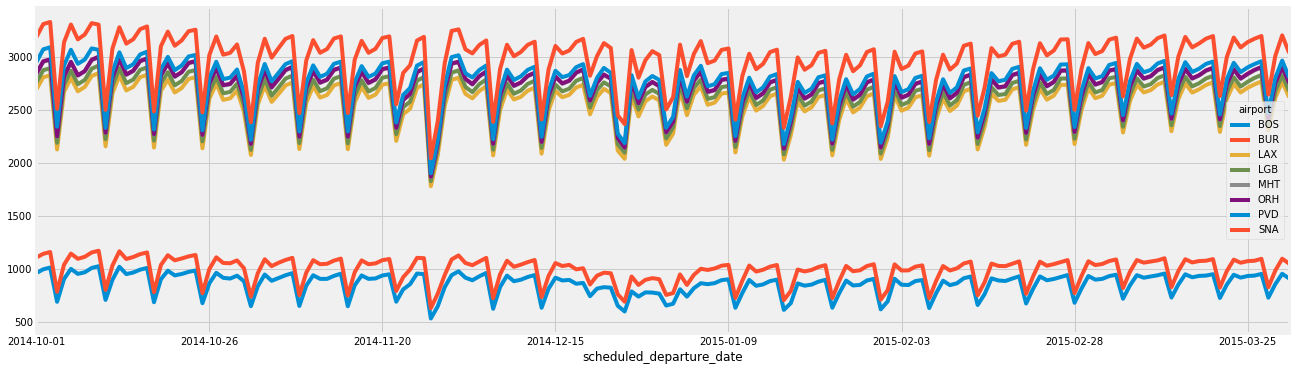

In [54]:
# daily flight operations
flights_by_airport.plot(figsize=[20,6],stacked=True )

In [55]:
# mean delay by airport (seconds).
mean_delay_by_airport = df.pivot_table(index='scheduled_departure_date', columns='airport', values='delay', aggfunc='mean')

mean_delay_by_airport.head(10)


airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
scheduled_departure_date,,,,,,,,
2014-10-01,1597.597911,-10.909091,144.369085,-210.000000,1062.500000,390.0,940.588235,241.818182
2014-10-02,699.519595,588.837209,823.879245,268.656716,1094.117647,-270.0,617.647059,580.476190
2014-10-03,581.544209,-36.521739,544.915129,-404.545455,909.600000,-440.0,651.176471,320.454545
2014-10-04,142.243346,-116.000000,435.081081,27.619048,-312.727273,-740.0,28.846154,-355.800000
2014-10-05,57.566434,68.181818,437.142857,134.328358,-192.000000,-600.0,107.796610,69.836066
2014-10-06,201.439206,-56.000000,340.297177,357.352941,602.307692,-885.0,76.521739,348.358209
2014-10-07,558.972332,42.857143,330.514821,14.328358,-30.000000,-780.0,-28.235294,311.904762
2014-10-08,15.076531,821.739130,335.212355,146.363636,126.923077,1230.0,296.470588,286.363636
2014-10-09,102.963885,377.727273,385.897059,1.764706,-30.000000,960.0,389.552239,349.253731


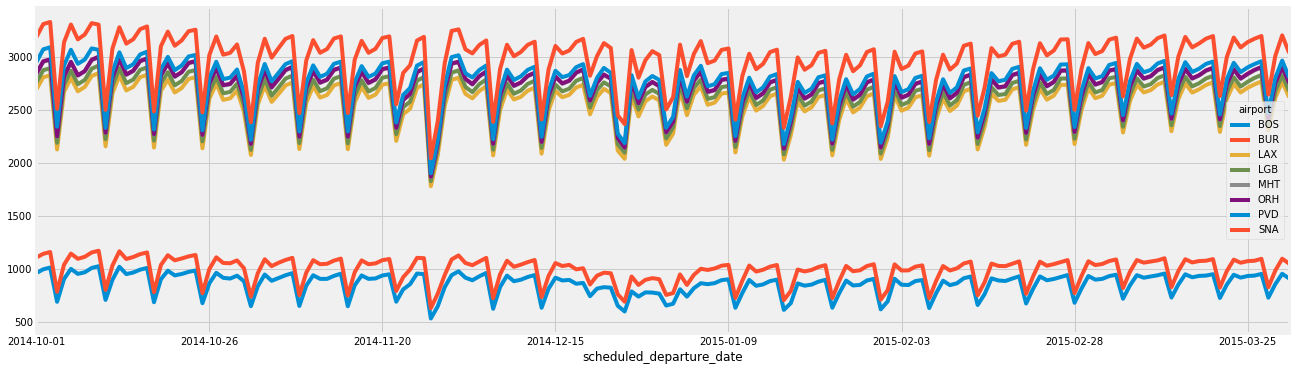

In [56]:
flights_by_airport.plot(figsize=[20,6],stacked=True )

In [57]:
# mean arrival delay by airport (seconds).
mean_arr_delay_by_airport = df_arr.pivot_table(index='scheduled_departure_month', columns='airport', values='diff_arr', aggfunc='mean')

mean_arr_delay_by_airport

airport,KBOS,KBUR,KLAX,KLGB,KORH,KSNA,MHT,PVD
scheduled_departure_month,,,,,,,,
1,532.620224,219.446015,134.905635,63.190751,305.555556,-37.541796,705.701254,810.779896
2,1403.508287,409.303202,370.166823,326.113990,643.043478,87.160243,898.627700,684.672897
3,518.656457,144.423913,382.051696,108.354143,34.426230,-56.349345,644.821429,518.726483
10,386.413103,196.347032,68.232651,-92.112676,-212.459016,65.892031,303.324100,418.897397
11,184.505406,365.462185,104.908113,187.872106,-381.052632,68.173469,432.640693,406.588235
12,349.895814,775.731360,635.610953,302.043956,32.631579,447.905695,613.082260,445.267857


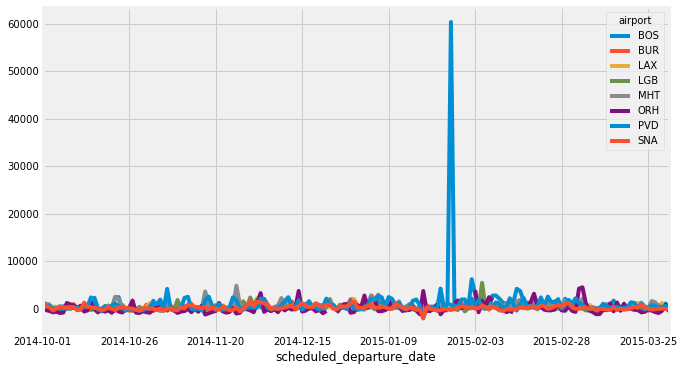

In [58]:
mean_delay_by_airport.plot(figsize=[10,6])

In [59]:
mean_delay_by_airport = df.pivot_table(index='scheduled_departure_month', columns='airport', values='diff_dep', aggfunc='mean')
mean_delay_by_airport

airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
scheduled_departure_month,,,,,,,,
1,561.645440,339.994358,503.899140,250.450958,782.604226,406.486486,924.107143,273.569667
2,1164.773094,509.539618,614.816487,505.883100,890.127065,634.838710,913.033359,343.740304
3,586.930967,314.231499,713.118865,300.764120,743.379722,117.024793,638.994549,316.065669
10,437.483927,106.600610,380.472515,43.713866,507.586685,38.225806,421.446809,261.108287
11,366.535935,398.727273,479.530716,405.234754,491.090253,-144.310345,842.613430,358.854962
12,447.371914,821.854155,858.692456,510.935484,642.124506,112.372881,806.001263,733.882639


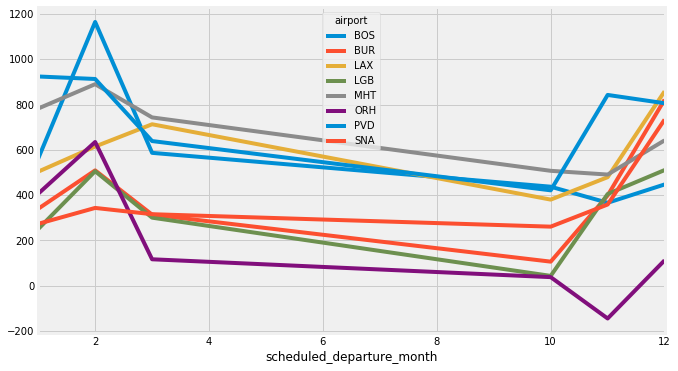

In [60]:
mean_delay_by_airport.plot(figsize=[10,6])

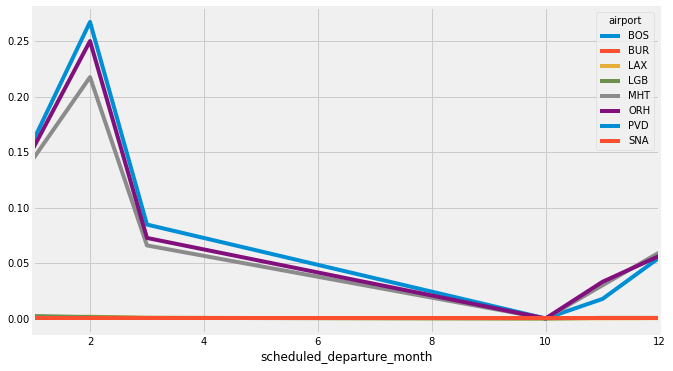

In [61]:
weather_by_airport = df.pivot_table(index='scheduled_departure_month', columns='airport', values='snow', aggfunc='mean')
weather_by_airport.head()
weather_by_airport.plot(figsize=[10,6])

In [62]:
df.sd_hour.head()


0     9
1    11
2    10
3    10
4    12
Name: sd_hour, dtype: int64

airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
sd_hour,,,,,,,,
0,39.0,NaN,3711.0,NaN,7.0,NaN,2.0,NaN
1,3.0,NaN,1473.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
3,124.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN
4,192.0,NaN,35.0,NaN,NaN,NaN,NaN,NaN
5,1951.0,166.0,1756.0,NaN,432.0,NaN,86.0,NaN
6,11104.0,979.0,16011.0,658.0,1038.0,1.0,893.0,2547.0
7,10605.0,2203.0,18063.0,819.0,1018.0,25.0,991.0,2325.0
8,12407.0,1756.0,20346.0,1002.0,210.0,112.0,790.0,3965.0


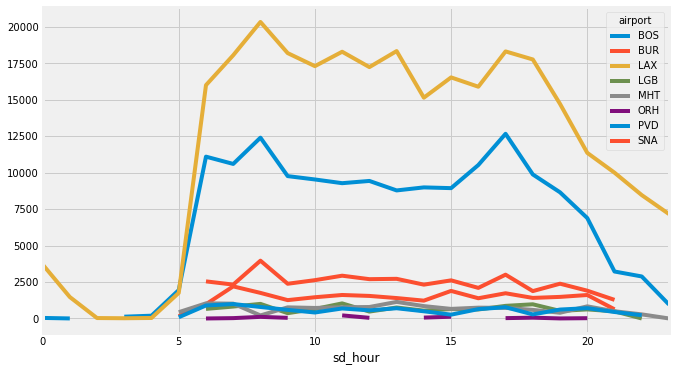

In [63]:
hourly_operlation= df.pivot_table(index ='sd_hour', columns= 'airport', values= 'flt_no', aggfunc='count')
hourly_operlation.plot(figsize=[10,6])
hourly_operlation

In [64]:
df.pivot_table(columns='scheduled_departure_date')

scheduled_departure_date,2014-10-01,2014-10-02,2014-10-03,2014-10-04,2014-10-05,2014-10-06,2014-10-07,2014-10-08,2014-10-09,2014-10-10,...,2015-03-22,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-28,2015-03-29,2015-03-30,2015-03-31
Unnamed: 0,63517.860911,61133.061650,61589.270051,64637.199602,63467.244820,61342.008169,61086.304581,59416.849268,58857.960820,60487.328087,...,38241.256667,34683.774041,36470.537067,36954.494744,37070.419741,34226.419456,36900.020416,33263.544035,31916.306275,33463.230161
cancelled,0.243014,0.248413,0.235206,0.231474,0.233663,0.231770,0.237915,0.233572,0.233273,0.230932,...,0.062000,0.063482,0.057948,0.057025,0.060864,0.054426,0.063516,0.059488,0.057134,0.041488
delay,643.834586,750.763636,518.311534,265.727700,267.560771,286.022187,368.100000,230.020433,276.232227,575.942948,...,704.012876,726.842105,128.598002,208.187373,515.729202,495.817819,288.257699,752.996801,632.183450,199.255429
dep,0.507064,0.509822,0.508561,0.508765,0.509085,0.508018,0.508057,0.508564,0.509644,0.509080,...,0.509000,0.509428,0.509226,0.509079,0.508042,0.509853,0.507372,0.508807,0.509210,0.516628
dew_pt,58.848446,47.111635,40.935716,48.657809,49.847689,51.501120,57.345403,57.493367,51.479747,52.476846,...,36.886633,35.104965,37.667271,42.206212,45.009713,46.077667,48.486843,41.611831,46.308711,43.707837
diff_arr,555.955056,771.691562,397.049051,281.591264,141.841004,366.700990,241.574344,132.825733,298.177515,562.743083,...,554.377682,548.825911,-73.563060,84.879539,530.966655,382.794411,114.870340,512.921109,547.295681,31.191710
diff_dep,632.874326,592.882992,528.664572,375.023328,408.394343,425.836944,451.666667,360.609508,433.160377,676.033058,...,760.277186,812.134228,277.402062,397.195946,679.644056,704.657625,496.398870,807.498233,734.900662,374.180694
early_arr,0.101413,0.083711,0.100931,0.142629,0.145362,0.110439,0.095735,0.116786,0.098855,0.092615,...,0.133667,0.136078,0.179346,0.163428,0.142226,0.175477,0.193195,0.178465,0.143928,0.184392
early_dep,0.003454,0.002115,0.003304,0.006375,0.002869,0.002421,0.003476,0.006851,0.003315,0.003027,...,0.004667,0.004085,0.006475,0.004141,0.001261,0.004379,0.002268,0.003323,0.003434,0.004939
flt_no,1986.107064,2067.568147,2057.661460,1966.554980,2044.482627,2074.798487,2083.295735,2079.668016,2060.136528,2041.437954,...,2141.851333,2083.862036,2110.148592,2094.010513,2082.289183,2080.082577,2120.679017,2139.271519,2070.832345,2104.471189


In [65]:
#how much of data is missing
df.isnull().sum().sort_values(ascending=False).head()

heat_index    539725
precip        485879
wind_gust     485458
wind_chill    422018
loca_arr      267262
dtype: int64

In [66]:
# grouped_arr.get_group('BOS').describe()

In [67]:
#get_dummies in pandas
# pd.get_dummies(df['month'])
# make date. 
#df['new']= df['early'].map(lambda x : "new"+x)
#df['new']= df['early'].map(lambda x : x*x)

In [68]:
def plot_histogram(x):
    plt.hist(x, alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

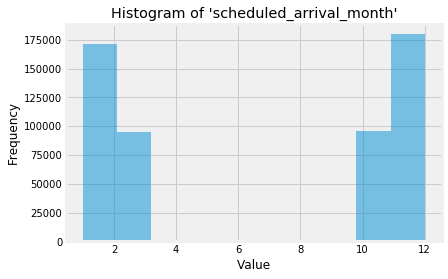

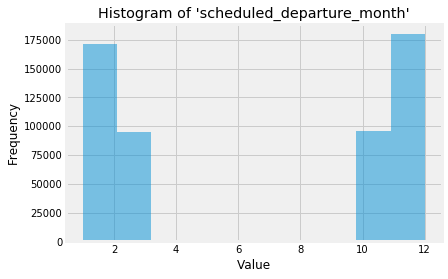

In [69]:
plot_histogram(df['scheduled_arrival_month'])
plot_histogram(df['scheduled_departure_month'])

In [70]:

# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

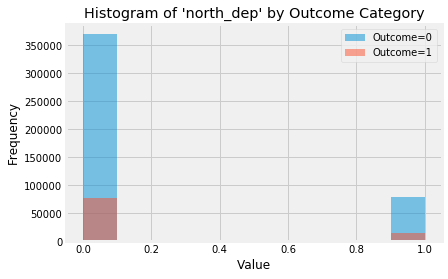

In [71]:
plot_histogram_dv(df['north_dep'],df['late_dep'])

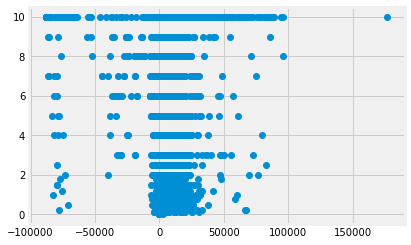

In [72]:
from matplotlib.pyplot import *
plot(df['delay'],df['vis'],'o') 


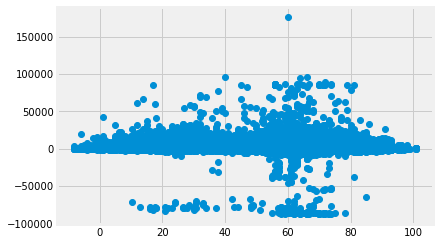

In [73]:
from matplotlib.pyplot import *
plot(df['temp'],df['delay'],'o') 

In [74]:
df['month']=df['scheduled_departure_month']

In [75]:
## OLS
result = sm.ols(formula ="delay ~ temp +vis+ +snow + north", data= df).fit()
print(result.params)
print (result.summary())

Intercept    1589.895106
temp          -11.127370
vis           -50.333487
snow          604.524478
north        -209.766516
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     774.6
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        15:22:01   Log-Likelihood:            -4.3695e+06
No. Observations:              467195   AIC:                         8.739e+06
Df Residuals:                  467190   BIC:                         8.739e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Con

In [76]:
## furture job.  congestion  and dummy for month 

